# 1. 선 그래프 (Line plot) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x와 y의 원소개수는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

In [1]:
#선 그래프 (lineplot)는 변화가 있는 데이터를 쓸 때 사용하는 그래프이다.

## 1.2 선 스타일
- https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

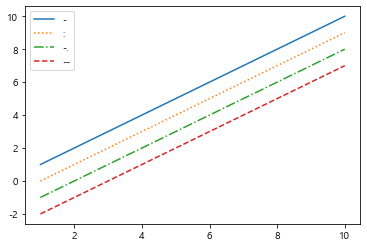

In [21]:
import matplotlib.pyplot as plt #import 한다.

import numpy as np

x = np.linspace(1,10,num=100) #linspace : 1에서부터 10까지 같은 간격으로 떨어진 nums개의 실수를 반환한다.
#이 nums의 개수가 몇개인지를 잘 따져보는 것이 매우 중요하다.

#선그래프 - plot(x,y)
plt.plot(x,x,label="-") #서로의 교차점에 점을 찍는다. 그 점들이 연결이 되면 아래와 같이 직선이 나온다.
#물론, plot() 안에 어떤 값을 넣느냐에 따라서 직선이 될 수도 있고 곡선이 될 수도 있고...
plt.plot(x,x-1,linestyle=":",label=":") #x-1: 원소단위 계산(모든 원소들의 값에서 -1을 한다.)
plt.plot(x,x-2,linestyle="-.",label="-.") 
plt.plot(x,x-3,linestyle="--",label="--") 
#linestyle이나 label 등을 잘 조작해보자.
plt.legend() #label에 관한 설명을 보여준다.
plt.show() #그래프를 한꺼번에 그려준다.

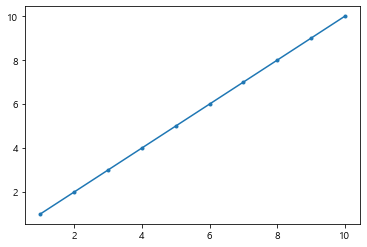

In [23]:
x = np.linspace(1,10,num=10)
plt.plot(x,x,marker='.') #데이터가 교차되는 곳에 marker를 찍는다.
plt.show()

In [28]:
#데이터를 불러오자.

import pandas as pd
df=pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv')

In [26]:
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도(㎍/㎥/시)
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


In [27]:
df['최대농도(㎍/㎥/시)']

0     2941
1     1355
2      933
3     1157
4     1354
5      662
6      338
7      226
8      259
9      902
10     481
11     423
Name: 최대농도(㎍/㎥/시), dtype: int64

In [32]:
df.rename(columns={df.columns[-1]:"최대농도"},inplace=True) 
#이런 식으로 이름을 잘 바꿀 수 있다.

In [33]:
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


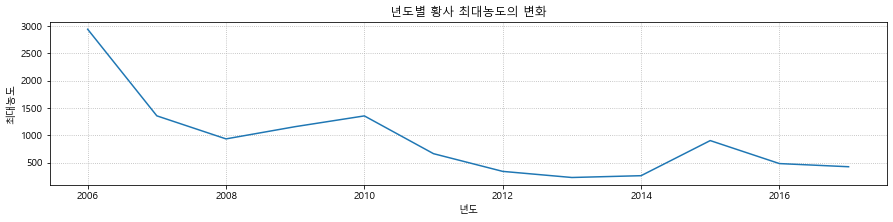

In [39]:
#년도에 따른 황사 최대농도의 변화흐름
## x축: 변화흐름의 기준값들(년도), y축: 변화량 값(최대농도)


plt.figure(figsize=(15,3)) #그래프의 가로 세로 축을 조작할 수 있다. figsize가 그래서 중요하다.
plt.plot(df['년도'],df['최대농도'])#x축은 '년도'이고, y축은 '최대농도'이다.


#추가적인 옵션을 만진다.
plt.title("년도별 황사 최대농도의 변화")
plt.xlabel("년도")
plt.ylabel("최대농도")
plt.grid(True,linestyle=":") 
plt.show()

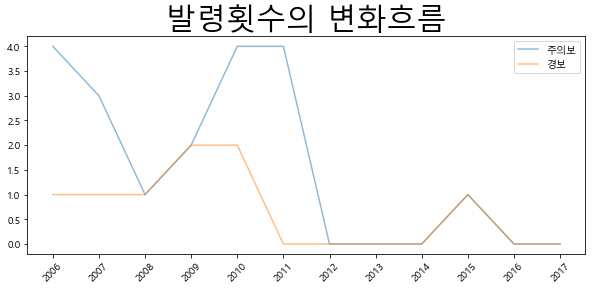

In [50]:
#년도에 따른 주의보/경보 발령횟수의 변화 흐름을 비교
#그냥 plt.plot을 두번 하면 땡이다.
plt.figure(figsize=(10,4))


#겹치는 부분을 다 보고 싶은 경우 alpha를 조절하면 된다. (모든 plot의 공통 파라미터이다.)
plt.plot(df['년도'],df['주의보 발령횟수'],label="주의보",alpha=0.5)
plt.plot(df['년도'],df['경보 발령횟수'],label="경보",alpha=0.5)

plt.title("발령횟수의 변화흐름",fontsize=30)
plt.xticks(ticks=df['년도'],fontsize=10,rotation=45) #x축의 것들을 설정하는 것.
#fontsize나 rotation 등으로 설정들을 더 편하게 바꿀 수 있다.


plt.legend()
plt.show()

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

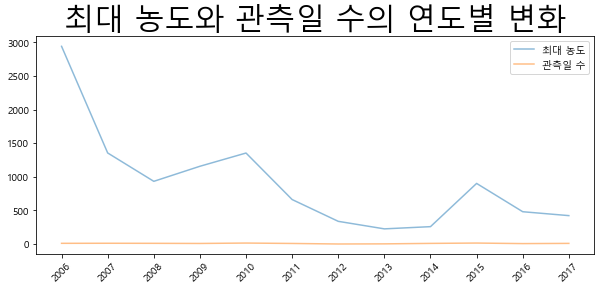

In [53]:
#최대 농도와 관측일 수의 데이터의 범위가 매우 상이하다. 그래서 2개의 기준을 적용해야 한다. 어떻게 할까?
#중요한 내용이니 복습을 잘 하도록 하자.
plt.figure(figsize=(10,4))


#겹치는 부분을 다 보고 싶은 경우 alpha를 조절하면 된다. (모든 plot의 공통 파라미터이다.)
plt.plot(df['년도'],df['최대농도'],label="최대 농도",alpha=0.5)
plt.plot(df['년도'],df['관측일수'],label="관측일 수",alpha=0.5)

plt.title("최대 농도와 관측일 수의 연도별 변화",fontsize=30)
plt.xticks(ticks=df['년도'],fontsize=10,rotation=45) #x축의 것들을 설정하는 것.
#fontsize나 rotation 등으로 설정들을 더 편하게 바꿀 수 있다.


#최대농도와 관측일 수를 같이 보고 싶다면 어떻게 해야 할까?
#해답------>y축을 하나만 쓰지 말고, 양측을 다 써야 한다.


plt.legend()
plt.show()

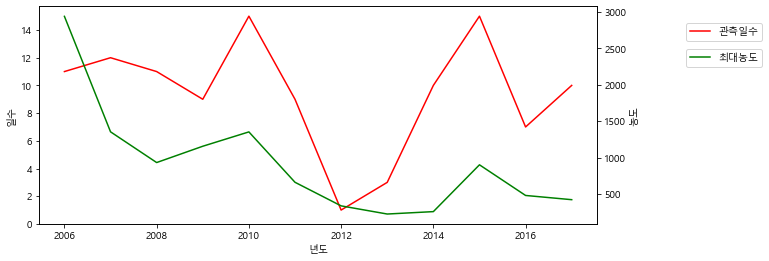

In [75]:
#위의 문제의 해답이다.
plt.figure(figsize=(10,4))
ax1 = plt.gca() #이 gca라는 메소드를 잘 보도록 하자.
ax2=ax1.twinx() #ax1과 x축을 공유하면서 오른쪽 spine이 y축인 axes를 생성한다.

ax1.plot(df['년도'],df['관측일수'],color='red',label='관측일수')
ax2.plot(df['년도'],df['최대농도'],color='green',label='최대농도')



#x축의 label

ax1.set_xlabel("년도")


#y축의 label

ax1.set_ylabel("일수")
ax2.set_ylabel("농도")


#일수 ticks를 조정한다. ticks를 조정한다는 것은 범위를 조정한다는 것.

ax1.set_yticks(range(0,16,2))

#ax1.legend(loc="upper left") #legend가 안나온다 치면, loc을 통해 위치를 정해줘야 한다.
#ax2.legend() #이렇게 양쪽의 legend가 다 나오게 해야 한다.
#loc:bbox의 어느 지점을 anchor 점에 맞출 것인지 지정한다.
#legend가 위치를 잡고 정박한다고 보면 된다.
ax1.legend(bbox_to_anchor=(1.305,0.82),loc='lower right')
ax2.legend(bbox_to_anchor=(1.305,0.7),loc='lower right')



plt.show()

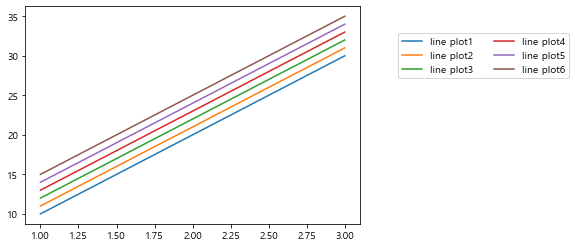

In [87]:
#legend box 설정

plt.plot([1,2,3],np.array([10,20,30]),label='line plot1')
plt.plot([1,2,3],np.array([10,20,30])+1,label='line plot2')
plt.plot([1,2,3],np.array([10,20,30])+2,label='line plot3')
plt.plot([1,2,3],np.array([10,20,30])+3,label='line plot4')
plt.plot([1,2,3],np.array([10,20,30])+4,label='line plot5')
plt.plot([1,2,3],np.array([10,20,30])+5,label='line plot6')

plt.legend(fontsize=10,ncol=2,bbox_to_anchor=(1.1,0.9),loc="upper left",shadow=True) #ncol:지정한 열수에 나눠서 출력
plt.show()


# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x축 값, 2번인수 y축 값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
        - x와 y의 원소의 수는 같아야 한다.
    - c/color: 색지정
        - c와 x, y와 같은 원소수를 가지는 Iterable 타입 객체로 설정할 경우 각 마커마다 다른 색상을 설정할 수 있다
    - s: 점 크기 지정
        

In [88]:
#산점도 그리기

df[['년도','최대농도']]

,년도,최대농도
0,2006,2941
1,2007,1355
2,2008,933
3,2009,1157
4,2010,1354
5,2011,662
6,2012,338
7,2013,226
8,2014,259
9,2015,902


In [90]:
import numpy as np
import matplotlib.pyplot as plt

x = range(1,1001,50)
y = range(1,1001,50)
y2 = range(1000,0,-50)



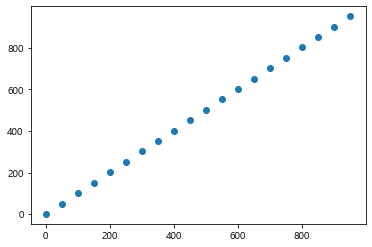

In [91]:
plt.scatter(x,y)

In [92]:
print(list(x))
print(list(y))

[1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951]
[1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951]


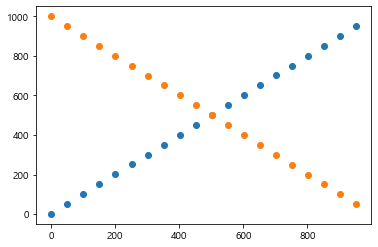

In [94]:
plt.scatter(x,y)
plt.scatter(x,y2) #반비례 관계를 그려본 것이다.
plt.show()

In [96]:
np.random.randint(1,5,30) #랜덤값:1에서 5 사이의 정수 30개를 반환

array([2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 4, 2, 1, 2, 1, 1, 3, 2, 3, 3, 3, 2,
       4, 4, 2, 3, 1, 1, 4, 2])

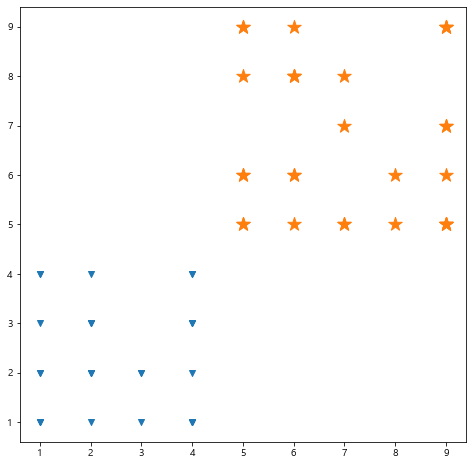

In [107]:
#예시를 한번 만들어보자.

plt.figure(figsize=(8,8))

plt.scatter(x=np.random.randint(1,5,30),
           y=np.random.randint(1,5,30),
           marker="v") #marker는 마커의 모양을 바꾸는 것이다.


#plt.scatter는 여러개를 불러올 수 있다.
plt.scatter(x=np.random.randint(5,10,30),
           y=np.random.randint(5,10,30),
           marker="*",s=200)
#s는 마커의 크기를 바꿀 때 쓰는 것이다.

plt.show()

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/stable/api/markers_api.html
- s
    - 정수: 마커의 크기
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

## 2.3 산점도 활용

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#위 3가지 것들은 기본적으로 import 한다고 보면 된다.



In [111]:
df = pd.read_csv('data/diamonds.csv')
df.shape

(53940, 10)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


###  캐럿(carat)과 가격(Price)간의 상관관계 시각화

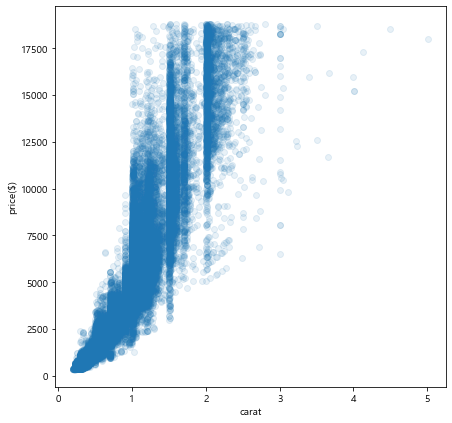

In [119]:
plt.figure(figsize=(7,7))
plt.scatter(df['carat'],df['price'],alpha=0.1) #x,y 연속형 값 - 상관관계(비례,반비례)를 시각적으로 확인한다.
#alpha를 통해 점을 흐릿하게 만든다.
plt.xlabel("carat")
plt.ylabel("price($)")
plt.show()

> - 상관계수 
>     - 두 변수간의 상관관계(비례/반비례)를 정량적(수치적)으로 계산한 값.
>         - 양수: 양의 상관관계(비례관계), 음수: 음의 상관관계(반비례관계)
>             - 양: 0 ~ 1,  음: -1 ~ 0
>         - 절대값 기준 1로 갈수록 강한상관관계, 0으로 갈수록 약한 상관관계(그냥 참고 정도로만 생각을 해보자.)
>             - 1 ~ 0.7: 아주 강한 상관관계
>             - 0.7 ~ 0.3 : 강한 상관관계
>             - 0.3 ~ 0.1 : 약한 상관관계
>             - 0.1 ~ 0 : 관계없다.

In [123]:
#상관계수 계산
## numpy의 함수

import numpy as np
r = np.corrcoef(df['price'],df['carat']) #두 데이터들 간의 상관 관계가 나온다.
#수치로 보았을 때, 가격과 carat는 매우 강한 상관관계를 가지고 있다.
r

array([[1.       , 0.9215913],
       [0.9215913, 1.       ]])

In [126]:
#앞에서 설정을 했던 r을 dataframe으로 본다.
pd.DataFrame(r,index=['price','carat'],columns=['price','carat'])

,price,carat
price,1.000000,0.921591
carat,0.921591,1.000000


In [128]:
##pandas - dataframe
#corr을 통해서도 상관관계를 구할 수 있다.
df[['carat','price']].corr()



,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


In [131]:
df[['carat','price','depth','x','y','z']].corr()
#corr함수를 통해 매우 쉽게 구할 수 있다.

,carat,price,depth,x,y,z
carat,1.000000,0.921591,0.028224,0.975094,0.951722,0.953387
price,0.921591,1.000000,-0.010647,0.884435,0.865421,0.861249
depth,0.028224,-0.010647,1.000000,-0.025289,-0.029341,0.094924
x,0.975094,0.884435,-0.025289,1.000000,0.974701,0.970772
y,0.951722,0.865421,-0.029341,0.974701,1.000000,0.952006
z,0.953387,0.861249,0.094924,0.970772,0.952006,1.000000


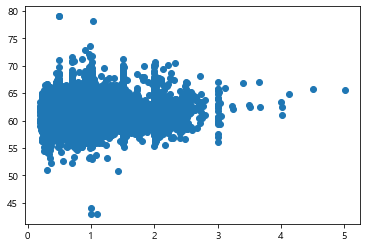

In [135]:
plt.scatter(df['carat'],df['depth']) #표를 만들어서 상관관계를 대충 볼 수 있다.
plt.show()

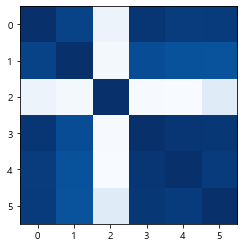

In [133]:
plt.imshow(df[['carat','price','depth','x','y','z']].corr(),cmap="Blues") #상관관계가 진할 수록 더 파란색을 띈다.
plt.show()

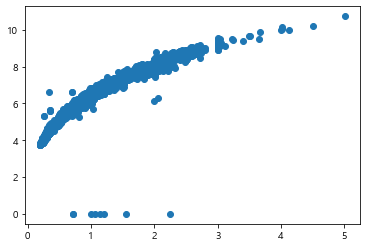

In [137]:
plt.scatter(df['carat'],df['x'])
plt.show() #일직선과 비슷하게 출력된다. 실제로도 상관관계 지수가 높다.

# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량/값의 크기를 비교하기 위해 막대 형식으로 나타낸 그래프
- 범주형 데이터의 class별 개수를 확인할 때 사용
- bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비  
- 매개변수
    - 첫번째: 수량을 셀 대상
    - 두번째: 수량

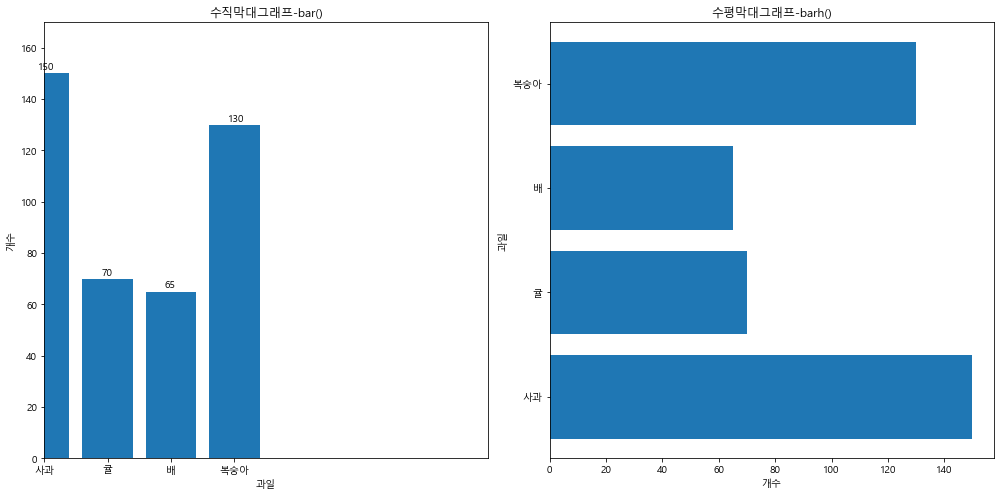

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fruit = ["사과","귤","배","복숭아"]
amount = [150,70,65,130]
##막대 그래프 데이터 - 분류값들, 개수들


plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.bar(fruit,amount) #이런 식으로 bar에 값들을 넣어준다.
plt.title("수직막대그래프-bar()")
plt.xlabel("과일")
plt.ylabel("개수")

# 개수를 막대 위에 text로 표시한다. 쓰는 방법을 잘 보도록 하자.
for x,y in enumerate(amount):#(0,150),(1,70), ...
    plt.text(x-0.1,y+1.5,str(y))
    
#y축값의 범위를 변경-----'0에서 부터 170까지 값을 강제로 잡아줘!'
plt.ylim(0,170)

#x축값의 범위를 변경

plt.xlim(0,7)






plt.subplot(1,2,2)
plt.barh(fruit,amount) #y축에 fruit가 들어가고 width에 amount가 들어간다.
#약간 bar을 눕힌 것이라고 보면 된다.
plt.title("수평막대그래프-barh()")
plt.xlabel('개수')
plt.ylabel('과일')







plt.tight_layout()
plt.show()

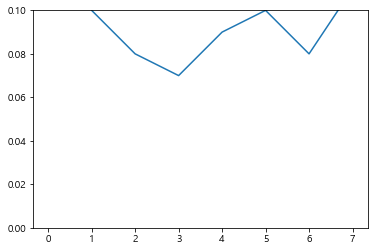

In [164]:

a=[1,0.1,0.08,0.07,0.09,0.1,0.08,0.11]
plt.plot(range(8),a)

#y의 범위를 인위적으로 조작한다. 이렇게 조작하면 원래 그래프의 일부분밖에 보이지 않게 될 것이다.
#왜 굳이 이렇게 하나고? 세세한 값의 변동 범위를 보기 위해서이다.
plt.ylim(0,0.1)
plt.show()

In [ ]:
#범주형 컬럼의 빈도수글 시각화.

v = df['color'].value_counts()


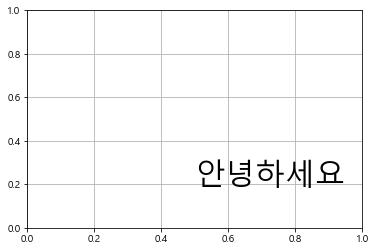

In [153]:
#axes에 글씨 쓰기------text메소드를 이용한다.

plt.text(0.5, #글씨를 쓸 x좌표
         0.2, #y좌표
        "안녕하세요", 
        fontsize=30)#문자열

plt.grid(True)
plt.show()



In [166]:
v=df['color'].value_counts()
v

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

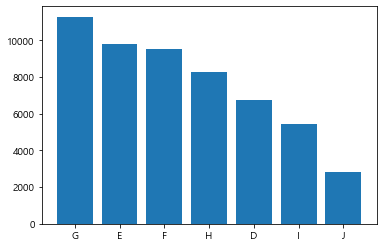

In [172]:
plt.bar(v.index,v,width=0.8) #index가 범주값이고 v가 value이다.
#width을 1로 하면.... 그냥 붙는다!
plt.show()

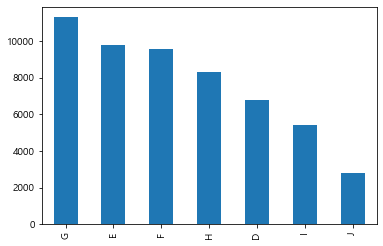

In [169]:
v.plot(kind="bar");

## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)

In [174]:
import pandas as pd

df = pd.read_excel("data/강수량.xlsx")
df.set_index("계절",inplace=True)

In [176]:
df #set_index 덕분에 계절이 따로 빠졌음을 알 수 있다.

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


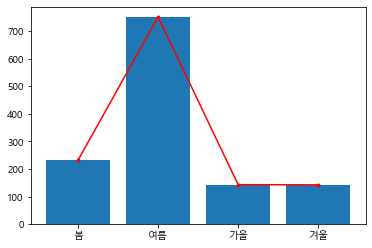

In [181]:
#2009년 계절벌 강수량 크기 비교

plt.bar(df.index,df[2009]) #양적 비교
plt.plot(df.index,df[2009],color='red',marker=".") #변화의 흐름
plt.show()

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 봄 to 겨울
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2009    4 non-null      float64
 1   2010    4 non-null      float64
 2   2011    4 non-null      float64
 3   2012    4 non-null      float64
 4   2013    4 non-null      float64
 5   2014    4 non-null      float64
 6   2015    4 non-null      float64
 7   2016    4 non-null      float64
 8   2017    4 non-null      float64
dtypes: float64(9)
memory usage: 320.0+ bytes


In [ ]:
#자세한 예시가 있었는데, 